In [1]:
import numpy as np
import matplotlib.pyplot as plt
import lbg_forecast.nz_model as nz
from lbg_forecast.nz_model import NzModel

In [2]:
def gather_redshifts(nfiles, path):
    i = 0
    nz_data = []
    while(i < nfiles):
        nzs = np.load(path+"redshifts/emulated_redshifts_"+str(i)+".npy", allow_pickle=True)
        nsamples = nzs.shape[0]
        j = 0
        while(j < nsamples):
            nz_data.append(nzs[j, :])
            j+=1
        i+=1

    return np.asarray(nz_data)

In [3]:
#convert histogram to function (old code - slow)
def pdf(z, hist):
    
    bin_l = len(hist[1])
    pdf_l = len(hist[0]) #(bin_l - 1)
    
    bin_list = hist[1]
    pdf_list = hist[0]
    bin_no = 0
    
    for binn in bin_list:
        if(bin_no >= pdf_l):
            break
        if(binn > z):
            break
        bin_no+=1
    
    bin_no = bin_no-1
    if(bin_no > 0 or bin_no < bin_l):
        return pdf_list[bin_no]
    else:
        return 0.0
    
def get_zgrid_for_bins(hist_bins, factor):

    bins_start = hist_bins[0]
    bins_end = hist_bins[-1]

    z_list = np.linspace(bins_start, bins_end, len(hist_bins)*factor)

    return z_list

#over sample by factor of 10
def convert_hist_to_pdf(hist, factor):
        
        z_list = get_zgrid_for_bins(hist[1], factor)
        pdf_list = []
        for z in z_list:
            pdf_list.append(pdf(z, hist))

        #plt.plot(z_list, pdf_list)
        
        return (z_list, pdf_list)

#very slow!!!
def process_redshifts(nzs, bin_size, factor, path):
     
    dz = bin_size
    minz = 0.0
    maxz = 7.0
    bins = np.arange(minz, maxz+dz, dz)

    dropout = 0
    sample = 0
    nsamples = nzs.shape[0]
    newnzs = np.empty(3, dtype=object)
    while(dropout < 3):
        dropouts = []
        sample = 0
        while(sample < nsamples):
            nzhist = np.histogram(nzs[sample, dropout], density=True, bins=bins)
            dropouts.append(convert_hist_to_pdf(nzhist, factor)[1])
            sample+=1
        dropouts = np.asarray(dropouts)
        newnzs[dropout] = dropouts
        dropout+=1
    
    z_grid = get_zgrid_for_bins(bins, factor)
    np.save(path+"redshifts/nzus.npy", newnzs[0])
    np.save(path+"redshifts/nzgs.npy", newnzs[1])
    np.save(path+"redshifts/nzrs.npy", newnzs[2])
    np.save(path+"redshifts/z_grid.npy", z_grid)

    return z_grid, newnzs
               


In [4]:
nzs = gather_redshifts(1, path="./")
total_nzs = len(nzs)
print("total nzs:", total_nzs)

total nzs: 128


In [5]:
z_grid, nz_pdfs = process_redshifts(nzs, 0.2, 50, path="./")

In [6]:
nzmodel = NzModel(path="./")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


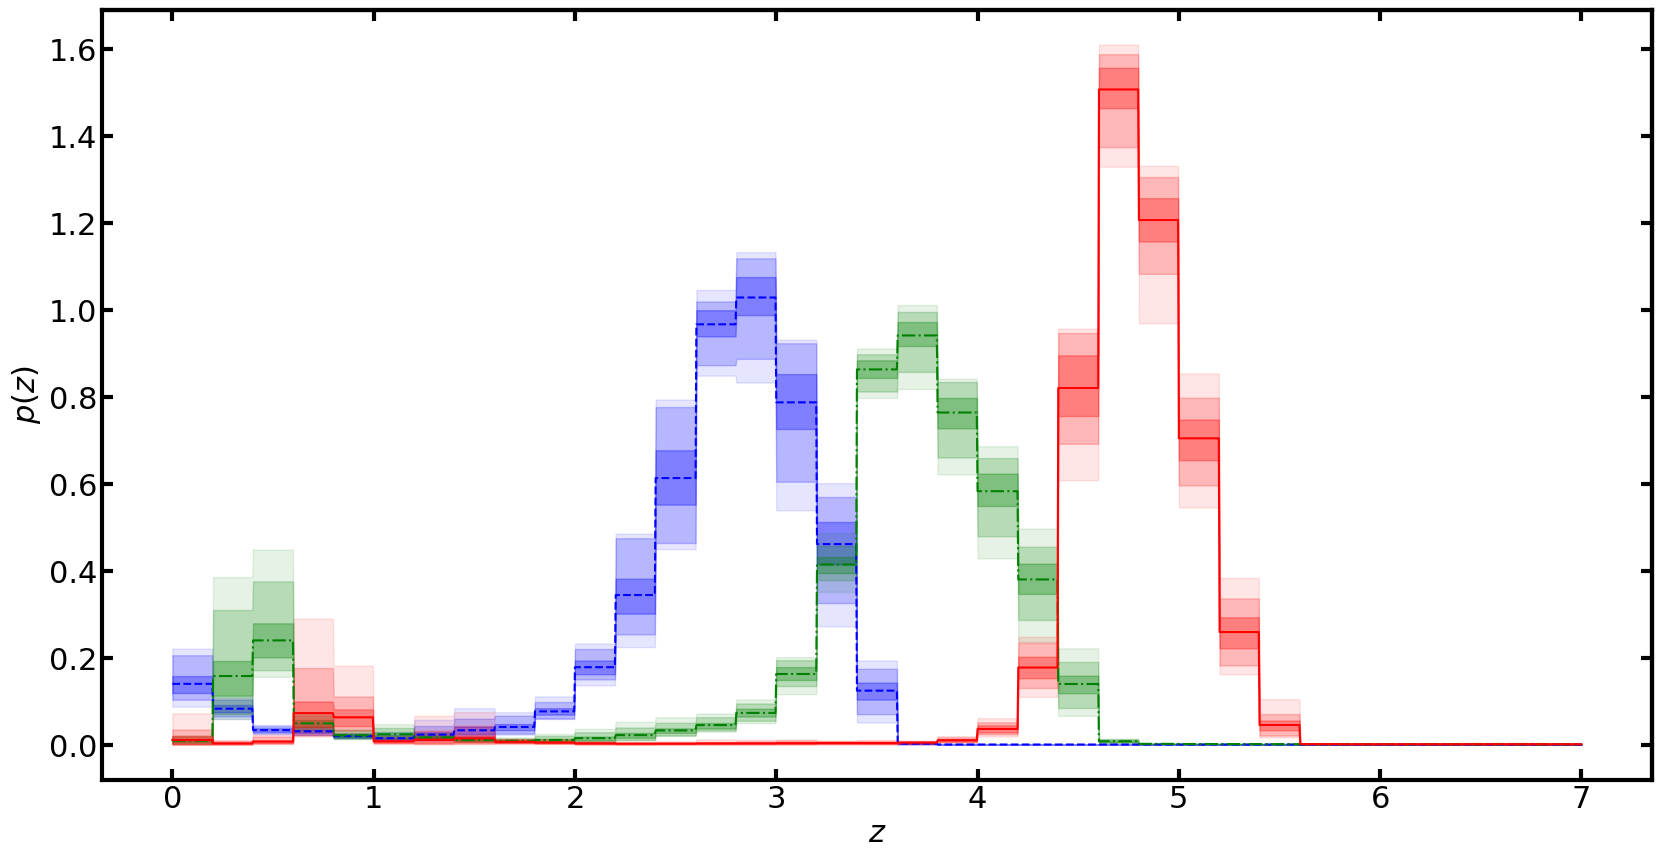

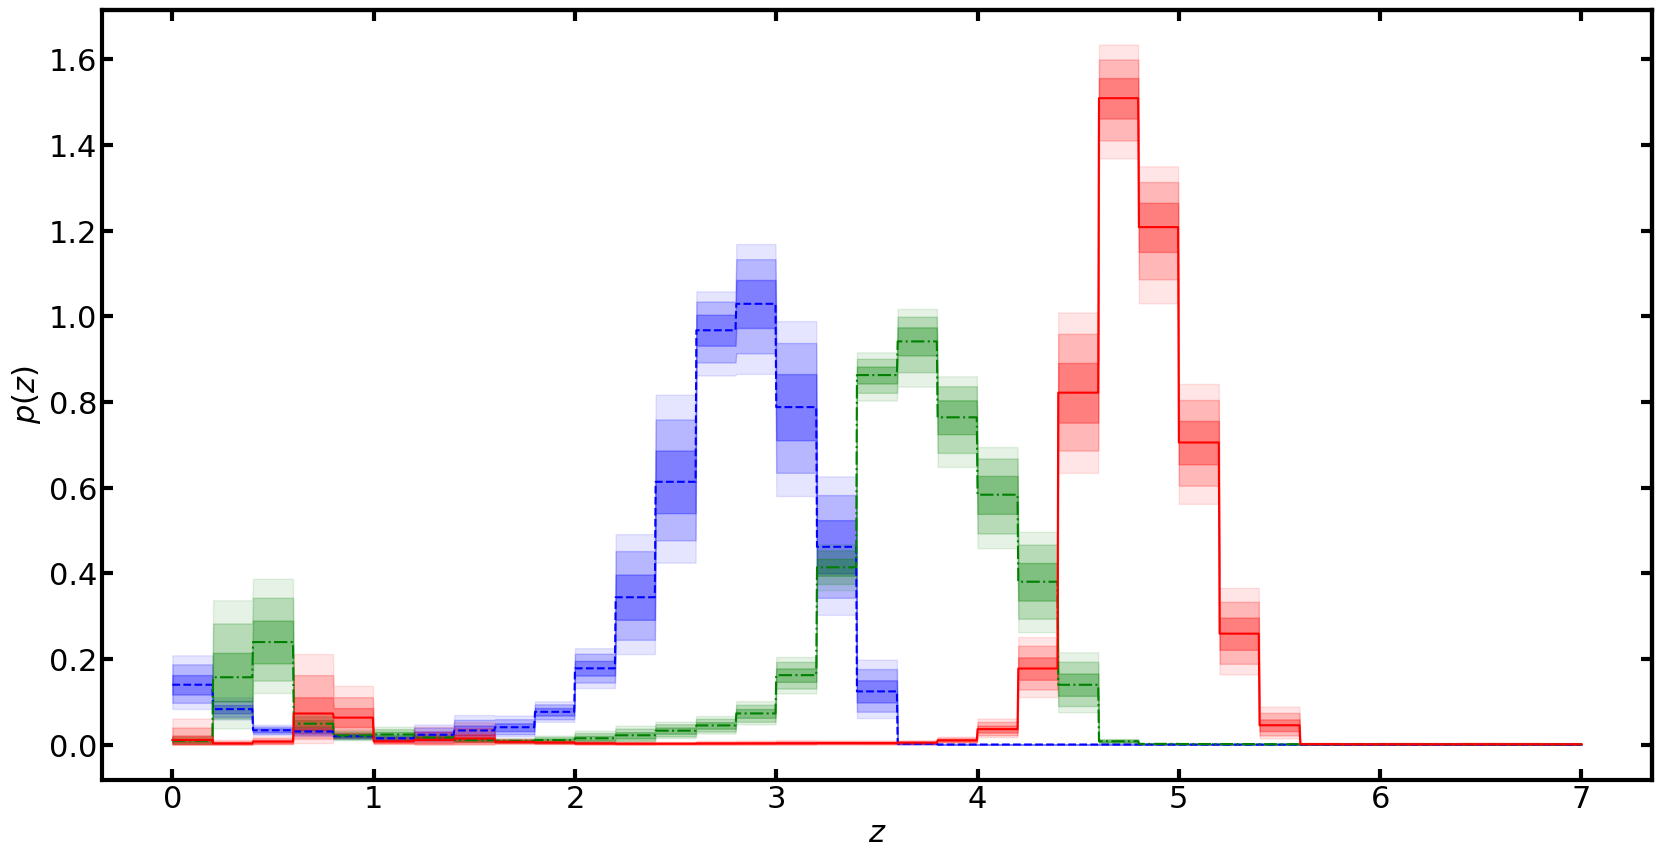

In [48]:
nzmodel.plot_all_data()
nzmodel.plot_all_pca(30, 10000)

In [46]:
k=50
pca_data_u = nz.perform_npca(nzmodel.u_data(), k)
pca_data_g = nz.perform_npca(nzmodel.g_data(), k)
pca_data_r = nz.perform_npca(nzmodel.r_data(), k)

[8.46633685e-01 8.01234013e-02 2.04494657e-02 8.86302839e-03
 6.16889229e-03 5.06099944e-03 3.66575407e-03 3.35933835e-03
 3.23450855e-03 3.12790085e-03 2.79964382e-03 2.67284653e-03
 2.32182381e-03 2.25214282e-03 1.94211891e-03 1.74259176e-03
 1.60968001e-03 1.48434295e-03 1.27087639e-03 9.04134073e-04
 3.12824760e-04 8.45280835e-33 8.45280835e-33 8.45280835e-33
 8.45280835e-33 8.45280835e-33 8.45280835e-33 8.45280835e-33
 8.45280835e-33 8.45280835e-33 8.45280835e-33 8.45280835e-33
 8.45280835e-33 8.45280835e-33 8.45280835e-33 8.45280835e-33
 8.45280835e-33 8.45280835e-33 8.45280835e-33 8.45280835e-33
 8.45280835e-33 8.45280835e-33 8.45280835e-33 8.45280835e-33
 8.45280835e-33 8.45280835e-33 8.45280835e-33 8.45280835e-33
 8.45280835e-33 8.45280835e-33] [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50] 0.9999999999999893
[8.85056290e-01 3.95429969e-02 1.54823107e-02 9.18925868e-03
 6

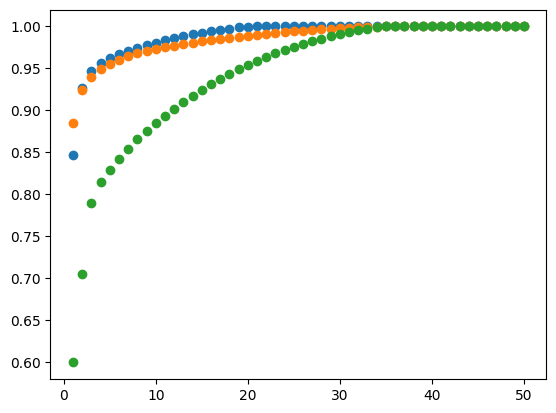

In [47]:
ev_u = pca_data_u[-1]
ev_g = pca_data_g[-1]
ev_r = pca_data_r[-1]
principle_components = np.arange(1, k+1)

cumev_u = np.cumsum(ev_u)
cumev_g = np.cumsum(ev_g)
cumev_r = np.cumsum(ev_r)

plt.scatter(principle_components, cumev_u)
plt.scatter(principle_components, cumev_g)
plt.scatter(principle_components, cumev_r)

(1800,)
16.15067165689868
14.73139801089462
13.122438108200189
12.96787834767255
12.119170661620199
11.723803306232435
10.93650316826612
10.378490235799449
8.242362648141476
7.976723136049257
8.130536906922108
8.135324985198444
7.836224010817006
7.7767888329075
7.507611153351984
7.0947236710406605
6.847698577655568
6.863484840476211
6.703443433220666
5.61607447428479
5.667977317442062
5.593707500794486
5.607987357435587
5.499237096923716
5.750563924162922
5.766873304033999
5.6086364885063125
5.563075431976351


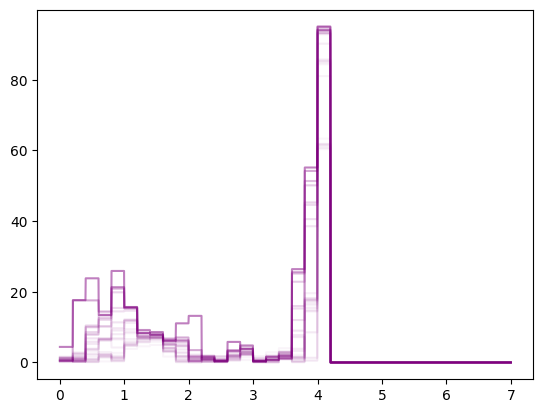

In [49]:
print(z_grid.shape)

running_err = []
pcas = np.arange(2, 30, 1)
for npca in pcas:

    binvals = nzmodel.u_data()
    binvals_pca = nzmodel.u_pca(npca, 10000)
    z_grid = nzmodel._z_space

    err = []
    for i in range(z_grid.shape[0]):
        binval = binvals[:, i]
        binval_pca = binvals_pca[:, i]
        if(np.std(binval)!=0):
            err.append(((abs(np.std(binval_pca) - np.std(binval)))/(np.std(binval)))*100)
        else:
            err.append(0)


    plt.plot(z_grid, err, color='purple', alpha=(1/npca))

    err=np.array(err)
    err = np.mean(err[np.where(err>0)[0]])
    running_err.append(err)
    print(err)

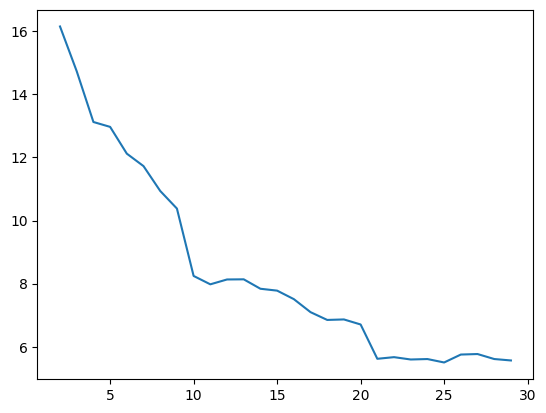

In [50]:
plt.plot(pcas, running_err)

1.0215419515462436


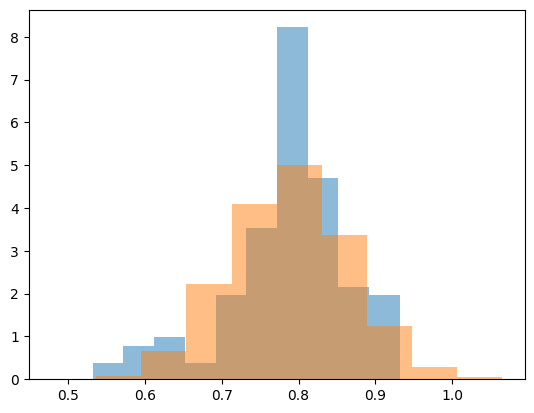

In [51]:
npca=30

binvals = nzmodel.u_data()
binvals_pca = nzmodel.u_pca(npca, 10000)
z_grid = nzmodel._z_space

error = []
for i in range(z_grid.shape[0]):
    binval = binvals[:, i]
    binval_pca = binvals_pca[:, i]
    if(np.std(binval)!=0):
        error.append(((abs(np.std(binval_pca) - np.std(binval)))/(np.std(binval)))*100)
    else:
        error.append(0)

    z=3.0
    if(i == int(z*(1800/7))):
        plt.hist(binval, density = True, alpha=0.5)
        plt.hist(binval_pca, density = True, alpha=0.5)
        print(error[i])

(1800,)
27.625749315064063
26.9286174939572
19.903192189271813
18.012932819944737
18.675623080384227
16.90849267523853
15.446646119110701
14.640124989657949
13.860758924852336
13.366133865529456
12.214411634216178
10.529060802963954
9.775458810050223
9.891653388849987
9.35575200778784
8.623455269494537
7.479809875007079
7.872229466346043
6.602779543729085
5.710062410923312
5.636351978798577
5.336134173350984
4.577492845685081
4.499976173729873
3.662101295711301
3.5832284182089658
3.078328399080158
2.763707234189573


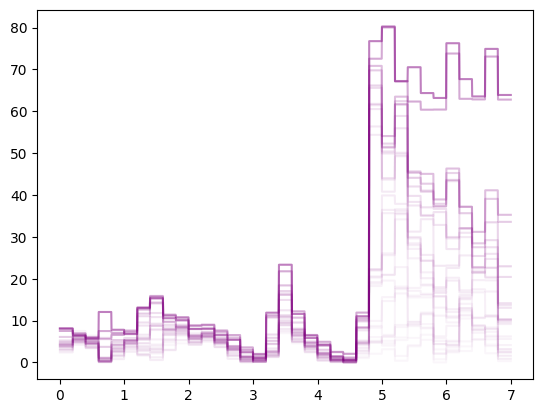

In [52]:
print(z_grid.shape)

running_err = []
pcas = np.arange(2, 30, 1)
for npca in pcas:

    binvals = nzmodel.g_data()
    binvals_pca = nzmodel.g_pca(npca, 10000)
    z_grid = nzmodel._z_space

    err = []
    for i in range(z_grid.shape[0]):
        binval = binvals[:, i]
        binval_pca = binvals_pca[:, i]
        if(np.std(binval)!=0):
            err.append(((abs(np.std(binval_pca) - np.std(binval)))/(np.std(binval)))*100)
        else:
            err.append(0)


    plt.plot(z_grid, err, color='purple', alpha=(1/npca))

    err=np.array(err)
    err = np.mean(err[np.where(err>0)[0]])
    running_err.append(err)
    print(err)

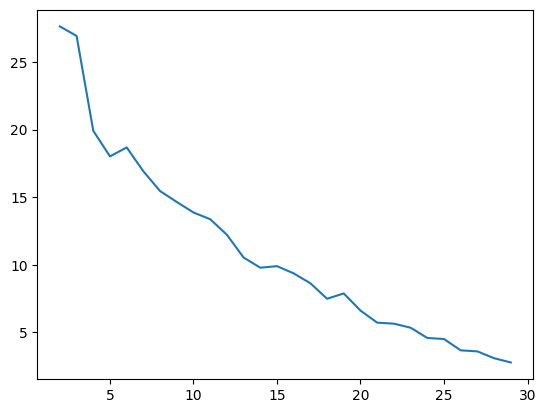

In [53]:
plt.plot(pcas, running_err)

2.4467162741598116


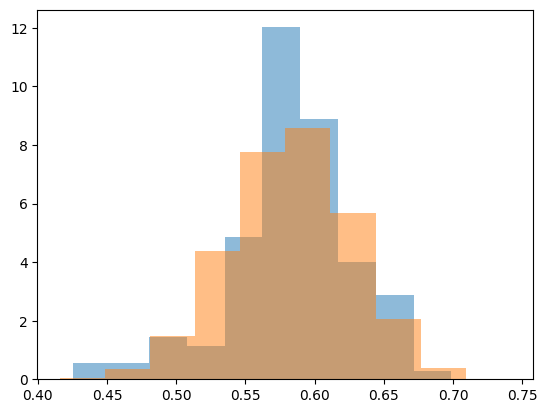

In [54]:
npca=30

binvals = nzmodel.g_data()
binvals_pca = nzmodel.g_pca(npca, 10000)
z_grid = nzmodel._z_space

error = []
for i in range(z_grid.shape[0]):
    binval = binvals[:, i]
    binval_pca = binvals_pca[:, i]
    if(np.std(binval)!=0):
        error.append(((abs(np.std(binval_pca) - np.std(binval)))/(np.std(binval)))*100)
    else:
        error.append(0)

    z=4.0
    if(i == int(z*(1800/7))):
        plt.hist(binval, density = True, alpha=0.5)
        plt.hist(binval_pca, density = True, alpha=0.5)
        print(error[i])

(1800,)
41.48628926887962
37.244266102303
32.85430576173937
29.841607591323402
26.8690867426633
23.72987022614975
21.404752660081193
20.099126357925325
18.576583026558442
16.92553397596006
14.650313028410094
13.441665372762717
12.450729924131547
11.459563535163998
10.810756209863511
10.492239762980818
9.892922753531105
10.311411967384576
9.80796926202981
9.592762048348499
9.461075622838624
8.986486985433391
9.053652351905008
8.497257049059703
8.994106309470983
8.660519704159109
8.327247442383305
8.102163004840355


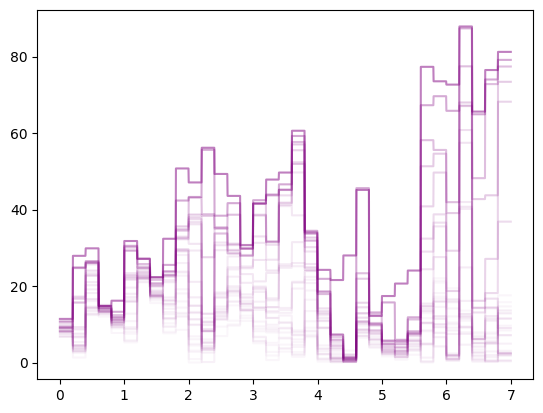

In [55]:
print(z_grid.shape)

running_err = []
pcas = np.arange(2, 30, 1)
for npca in pcas:

    binvals = nzmodel.r_data()
    binvals_pca = nzmodel.r_pca(npca, 10000)
    z_grid = nzmodel._z_space

    err = []
    for i in range(z_grid.shape[0]):
        binval = binvals[:, i]
        binval_pca = binvals_pca[:, i]
        if(np.std(binval)!=0):
            err.append(((abs(np.std(binval_pca) - np.std(binval)))/(np.std(binval)))*100)
        else:
            err.append(0)


    plt.plot(z_grid, err, color='purple', alpha=(1/npca))

    err=np.array(err)
    err = np.mean(err[np.where(err>0)[0]])
    running_err.append(err)
    print(err)

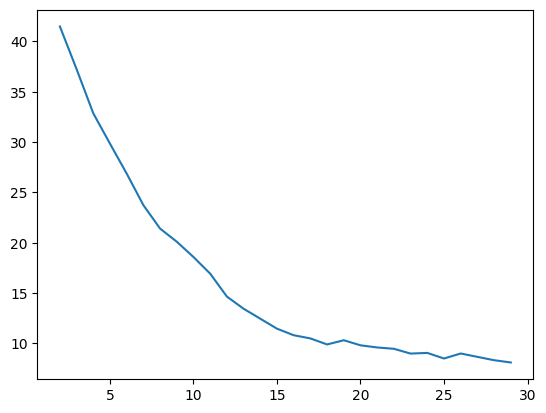

In [56]:
plt.plot(pcas, running_err)

2.541442602515681


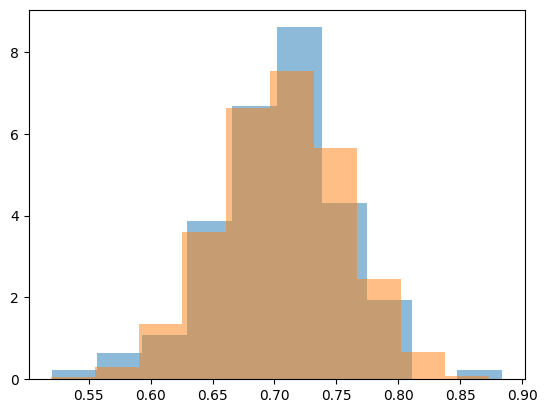

In [57]:
npca=30

binvals = nzmodel.r_data()
binvals_pca = nzmodel.r_pca(npca, 10000)
z_grid = nzmodel._z_space

error = []
for i in range(z_grid.shape[0]):
    binval = binvals[:, i]
    binval_pca = binvals_pca[:, i]
    if(np.std(binval)!=0):
        error.append(((abs(np.std(binval_pca) - np.std(binval)))/(np.std(binval)))*100)
    else:
        error.append(0)

    z=5.0
    if(i == int(z*(1800/7))):
        plt.hist(binval, density = True, alpha=0.5)
        plt.hist(binval_pca, density = True, alpha=0.5)
        print(error[i])